In [7]:
import pygad
import numpy
import imageio
import gary
import matplotlib.pyplot

C:\Users\MARIUXI\AppData\Local\Temp\ipykernel_3784\3511019581.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  target_im = imageio.imread('fruit.jpg')
C:\Users\MARIUXI\AppData\Local\Temp\ipykernel_3784\3511019581.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target_im = numpy.asarray(target_im/255, dtype=numpy.float)


[[[249 250 252]
  [249 250 252]
  [249 250 252]
  ...
  [246 250 251]
  [246 250 251]
  [246 250 251]]

 [[249 250 252]
  [249 250 252]
  [249 250 252]
  ...
  [246 250 251]
  [246 250 251]
  [246 250 251]]

 [[249 250 252]
  [249 250 252]
  [249 250 252]
  ...
  [246 250 251]
  [246 250 251]
  [246 250 251]]

 ...

 [[252 252 254]
  [252 252 254]
  [252 252 254]
  ...
  [252 252 254]
  [252 252 254]
  [252 252 254]]

 [[252 252 254]
  [252 252 254]
  [252 252 254]
  ...
  [252 252 254]
  [252 252 254]
  [252 252 254]]

 [[252 252 254]
  [252 252 254]
  [252 252 254]
  ...
  [252 252 254]
  [252 252 254]
  [252 252 254]]]
Generation = 1
Fitness    = 30100.413941914456
Generation = 2
Fitness    = 30100.413941914456
Generation = 3
Fitness    = 30110.455875375308
Generation = 4
Fitness    = 30133.992547210837
Generation = 5
Fitness    = 30133.992547210837
Generation = 6
Fitness    = 30144.31652129026
Generation = 7
Fitness    = 30144.31652129026
Generation = 8
Fitness    = 30144.388021803

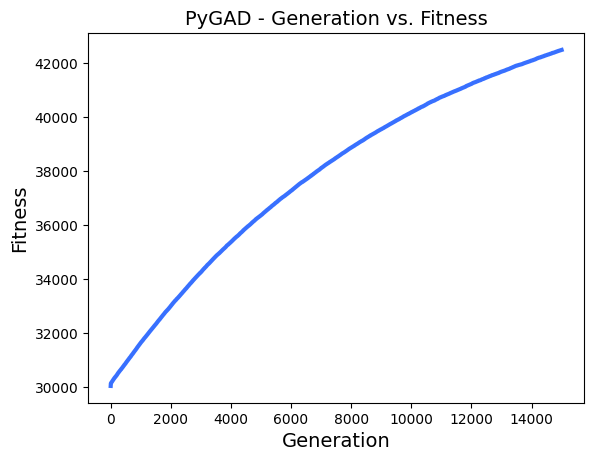

Fitness value of the best solution = 42480.12382483542
Index of the best solution : 0
Best fitness value reached after 14999 generations.


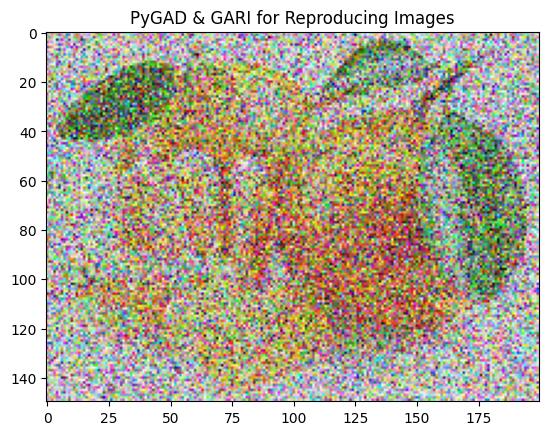

In [10]:

"""
GARI (Genetic Algorithm for Reproducing Images) is a Python project that uses the PyGAD library for reproducing images using the genetic algorithm. GARI reproduces a single image using Genetic Algorithm (GA) by evolving pixel values.
For implementing the genetic algorithm, the PyGAD library is used. Check its documentation here: https://pygad.readthedocs.io
This project works with both color and gray images without any modifications.
This project is implemented using Python 3.5 by Ahmed Fawzy Gad.
Contact info:
ahmed.f.gad@gmail.com
https://www.linkedin.com/in/ahmedfgad/
"""

# Reading target image to be reproduced using Genetic Algorithm (GA).
target_im = imageio.imread('fruit.jpg')
print(target_im)
target_im = numpy.asarray(target_im/255, dtype=numpy.float)

# Target image after enconding. Value encoding is used.
target_chromosome = gary.img2chromosome(target_im)

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10



def fitness_fun(solution, solution_idx):
    """
    Calculating the fitness value for a solution in the population.
    The fitness value is calculated using the sum of absolute difference between genes values in the original and reproduced chromosomes.
    
    solution: Current solution in the population to calculate its fitness.
    solution_idx: Index of the solution within the population.
    """

    fitness = numpy.sum(numpy.abs(target_chromosome-solution))

    # Negating the fitness value to make it increasing rather than decreasing.
    fitness = numpy.sum(target_chromosome) - fitness
    return fitness

def callback(ga_instance):
    print("Generation = {gen}".format(gen=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

    if ga_instance.generations_completed % 500 == 0:
        matplotlib.pyplot.imsave('solution_'+str(ga_instance.generations_completed)+'.png', gary.chromosome2img(ga_instance.best_solution()[0], target_im.shape))

ga_instance = pygad.GA(num_generations=500,
                       num_parents_mating=10,
                       fitness_func=fitness_fun,
                       sol_per_pop=20,
                       num_genes=target_im.size,
                       init_range_low=0.0,
                       init_range_high=1.0,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_percent_genes=0.01,
                       mutation_type="random",
                       mutation_by_replacement=True,
                       random_mutation_min_val=0.0,
                       random_mutation_max_val=1.0,
                       callback_generation=callback)

ga_instance.run()

# After the generations complete, some plots are showed that summarize the how the outputs/fitenss values evolve over generations.
ga_instance.plot_result()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

result = gary.chromosome2img(solution, target_im.shape)
matplotlib.pyplot.imshow(result)
matplotlib.pyplot.title("PyGAD & GARI for Reproducing Images")
matplotlib.pyplot.show()